In [1]:
import pickle, os, sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')
plt.rc('font', size=12)

In [2]:
with open('1_mmrf_dataset_type.pkl','rb') as f:
    dataset = pickle.load(f)
with open('1_mmrf_dataset_2mos_type.pkl','rb') as f:
    dataset_2mos = pickle.load(f)
print (dataset.keys())
print(dataset['baseline'].keys())
print (dataset_2mos.keys())
print(dataset_2mos['baseline'].keys())

dict_keys(['treatment', 'labs', 'baseline', 'outcomes', 'trt_outcomes'])
dict_keys(['pids', 'data', 'obs', 'names'])
dict_keys(['treatment', 'labs', 'baseline', 'outcomes', 'trt_outcomes'])
dict_keys(['pids', 'data', 'obs', 'names'])


In [3]:
from process_tensors import clean_baseline, clean_labs, get_splits

### Step 1: Restrict all data to share a global ordering over patient ids (from outcomes)
* Plot distribution over outcomes

In [4]:
new_dset = {}
outcomes_type = 'mortality' # or 'mortality'

if outcomes_type == 'mortality': 
    new_dset['patient_ids'] = dataset['outcomes']['pids']
    new_dset['y_data']   = dataset['outcomes']['data']
    new_dset['event_obs']= dataset['outcomes']['obs']
elif outcomes_type == 'trt_resp':
    new_dset['patient_ids'] = dataset['trt_outcomes']['pids']
    new_dset['y_data']      = dataset['trt_outcomes']['data']
    new_dset['event_obs']   = dataset['trt_outcomes']['obs']
    new_dset['tr_names']    = dataset['trt_outcomes']['names']
    
pts = new_dset['patient_ids'].tolist()
for k in ['treatment','labs','baseline']:
    pts_src = dataset[k]['pids'].tolist()
    idx_map = np.array([pts_src.index(v) for v in pts])
    new_dset[k+'_data'] = dataset[k]['data'][idx_map]
    new_dset[k+'_m']    = dataset[k]['obs'][idx_map]
    new_dset[k+'_names']= dataset[k]['names']
    
new_dset_2mos = {}

if outcomes_type == 'mortality':     
    new_dset_2mos['patient_ids'] = dataset_2mos['outcomes']['pids']
    new_dset_2mos['y_data']      = dataset_2mos['outcomes']['data']
    new_dset_2mos['event_obs']   = dataset_2mos['outcomes']['obs']
elif outcomes_type == 'trt_resp': 
    new_dset_2mos['patient_ids'] = dataset_2mos['trt_outcomes']['pids']
    new_dset_2mos['y_data']      = dataset_2mos['trt_outcomes']['data']
    new_dset_2mos['event_obs']   = dataset_2mos['trt_outcomes']['obs']
    new_dset_2mos['tr_names']    = dataset_2mos['trt_outcomes']['names']
    new_dset_2mos['ym_data']     = dataset_2mos['outcomes']['data']
    new_dset_2mos['ce']     = dataset_2mos['outcomes']['obs']

pts = new_dset_2mos['patient_ids'].tolist()
for k in ['treatment','labs','baseline']:
    pts_src = dataset_2mos[k]['pids'].tolist()
    idx_map = np.array([pts_src.index(v) for v in pts])
    new_dset_2mos[k+'_data'] = dataset_2mos[k]['data'][idx_map]
    new_dset_2mos[k+'_m']    = dataset_2mos[k]['obs'][idx_map]
    new_dset_2mos[k+'_names']= dataset_2mos[k]['names']

In [5]:
print(f'shape of treatment data: {new_dset_2mos["treatment_data"].shape}')
print(f'shape of lab data: {new_dset_2mos["labs_data"].shape}')
print(f'shape of baseline data: {new_dset_2mos["baseline_data"].shape}')

shape of treatment data: (1001, 33, 6)
shape of lab data: (1001, 33, 16)
shape of baseline data: (1001, 16)


### Step 2: Visualize outcome values after scaling

[39.53333333333333 70.63333333333334 65.23333333333333 64.66666666666667
 65.83333333333333 65.23333333333333 58.2 58.03333333333333
 57.56666666666667 57.56666666666667 52.1 17.4 43.666666666666664
 21.233333333333334 41.56666666666667 41.43333333333333 39.53333333333333
 12.666666666666666 34.36666666666667 30.866666666666667
 16.266666666666666 30.333333333333332 29.0 28.066666666666666
 71.16666666666667 71.43333333333334 67.26666666666667 66.76666666666667
 65.56666666666666 60.13333333333333 57.86666666666667 61.833333333333336
 22.633333333333333 58.166666666666664 57.1 54.96666666666667
 52.06666666666667 53.46666666666667 52.333333333333336 54.2
 51.93333333333333 52.733333333333334 53.56666666666667 51.13333333333333
 52.53333333333333 50.06666666666667 51.8 47.2 48.13333333333333 48.9 47.6
 42.7 47.13333333333333 49.13333333333333 46.46666666666667 43.3
 43.46666666666667 45.7 44.7 37.36666666666667 45.2 43.0 41.93333333333333
 41.7 36.2 39.56666666666667 39.8 41.56666666666

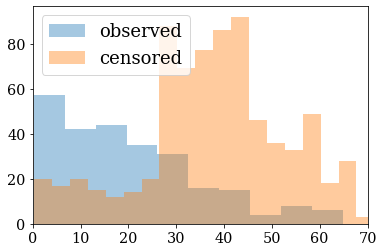

In [8]:
if outcomes_type == 'mortality':
    fig, axlist = plt.subplots(1,1)
    sns.distplot(new_dset['y_data'][new_dset['event_obs']==1],label='observed', ax = axlist, kde=False)
    sns.distplot(new_dset['y_data'][new_dset['event_obs']==0],label='censored', ax = axlist, kde=False)
    axlist.legend(fontsize=18)
    axlist.set_xlim([0,70])
elif outcomes_type == 'trt_resp': 
    fig, axlist = plt.subplots(1,1)
    sns.distplot(new_dset['y_data'], ax = axlist, kde=False)
    print(len(np.where(new_dset['y_data']==1.)[0]))

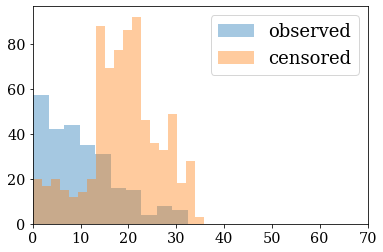

In [7]:
if outcomes_type == 'mortality':
    fig, axlist = plt.subplots(1,1)
    sns.distplot(new_dset_2mos['y_data'][new_dset_2mos['event_obs']==1],label='observed', ax = axlist, kde=False)
    sns.distplot(new_dset_2mos['y_data'][new_dset_2mos['event_obs']==0],label='censored', ax = axlist, kde=False)
    axlist.legend(fontsize=18)
    axlist.set_xlim([0,70])
elif outcomes_type == 'trt_resp': 
    fig, axlist = plt.subplots(1,1)
    sns.distplot(new_dset_2mos['y_data'], ax = axlist, kde=False)
    print(len(np.where(new_dset['y_data']==1.)[0]))

### Step 2: Clean baseline values (to be in a range -7 to 7ish where 0 corresponds to reference [max])

In [8]:
# Reference values for lab measurements
# min/max/scale (calculated by attempting to ensure that max labs lie b/w 5-8)
healthy_mins_max = {
    'cbc_abs_neut':(2., 7.5,1/3.), # abs neutrophil count (3.67, 1.), (2.83, 4.51)
    'chem_albumin':(34, 50,1/8.), # chemical albumin (43.62, 2.77), (41.30, 45.94)
    'chem_bun':(2.5, 7.1,1/5.), #BUN # reference range, (4.8, 1.15)
    'chem_calcium':(2.2, 2.7,2.), #Calcium, (2.45, 0.125)
    'chem_creatinine':(66, 112,1/36.), # creatinine, (83., 24.85), (62.22, 103.77)
    'chem_glucose':(3.9, 6.9,1/5.), # glucose, (4.91, 0.40), (4.58, 5.24)
    'cbc_hemoglobin':(13., 17.,1), # hemoglobin (12.90, 15.64), (8.86, 1.02)
    'chem_ldh':(2.33, 4.67,1/3.), #LDH, (3.5, 0.585)
    'serum_m_protein':(0.1, 1.1, 1), # M protein (<3 g/dL is MGUS, any presence of protein is pathological); am just using the data mean/std for this, (0.85, 1.89)
    'urine_24hr_m_protein':(0.0, 0.1, 1), # Urine M protein 
    'cbc_platelet':(150, 400,1/60.), # platelet count (206.42, 334.57), (270.5, 76.63)
    'chem_totprot':(6, 8,1/6.), # total protein, (7, 0.5)
    'urine_24hr_total_protein':(0, 0.23, 1), # 
    'cbc_wbc':(3, 10,1/4.), # WBC  (5.71, 8.44), (7.07, 1.63)
    'serum_iga':(0.85, 4.99, 1.), # IgA, (2.92, 1.035)
    'serum_igg':(6.10, 16.16,1/10.), # IgG, (11.13, 2.515)
    'serum_igm':(0.35, 2.42,1), #IgM, (1.385, 0.518)
    'serum_lambda':(0.57, 2.63, 1/2.), #serum lambda, (1.6, 0.515)
    'serum_kappa':(.33, 1.94,1/8.), #serum kappa , (1.135, 0.403)
    'serum_beta2_microglobulin':(0.7, 1.80, 1/3.), #serum_beta2_microglobulin,
    'serum_c_reactive_protein':(0.0, 1., 1.) #serum_c_reactive_protein,
}

In [9]:
clean_baseline(new_dset, healthy_mins_max)

A] Before cleaning
idx, featurename, min, mean, max
0 iss 1.0 1.853668071059385 3.0
1 age 27.0 63.926073926073926 93.0
2 gender 1.0 1.3956043956043955 2.0
3 ecog 0.0 0.8791469194312789 4.0
4 serum_beta2_microglobulin 0.20800000000000002 5.097520940528193 22.400000000000002
5 PC1 -30.66659494 -0.976063433574628 140.0614706
6 PC2 -34.81806261 1.4875103276082826 115.7871011
7 PC3 -57.38038138 -1.6638067204016924 51.23220332
8 PC4 -36.28005205 -2.1831262046966544 44.84930211
9 PC5 -37.58013775 0.041447565897195254 50.21645239
10 heavy_chain False 0.8551448551448552 True
11 igg_type False 0.6313686313686314 True
12 iga_type False 0.1798201798201798 True
13 igm_type False 0.057942057942057944 True
14 kappa_type False 0.6423576423576424 True
15 lambda_type False 0.34065934065934067 True
------
------
C] After cleaning
0 iss 1.0 1.853668 3.0 False
1 age -3.480064 -9.9083046e-08 2.7400453 False
2 gender -1.0 -0.20879121 1.0 False
3 ecog -0.06479224 -4.0967027e-08 0.23000352 False
4 serum_beta2_

In [10]:
clean_baseline(new_dset_2mos, healthy_mins_max)

A] Before cleaning
idx, featurename, min, mean, max
0 iss 1.0 1.853668071059385 3.0
1 age 27.0 63.926073926073926 93.0
2 gender 1.0 1.3956043956043955 2.0
3 ecog 0.0 0.8791469194312789 4.0
4 serum_beta2_microglobulin 0.20800000000000002 5.097520940528193 22.400000000000002
5 PC1 -30.66659494 -0.976063433574628 140.0614706
6 PC2 -34.81806261 1.4875103276082826 115.7871011
7 PC3 -57.38038138 -1.6638067204016924 51.23220332
8 PC4 -36.28005205 -2.1831262046966544 44.84930211
9 PC5 -37.58013775 0.041447565897195254 50.21645239
10 heavy_chain False 0.8551448551448552 True
11 igg_type False 0.6313686313686314 True
12 iga_type False 0.1798201798201798 True
13 igm_type False 0.057942057942057944 True
14 kappa_type False 0.6423576423576424 True
15 lambda_type False 0.34065934065934067 True
------
------
C] After cleaning
0 iss 1.0 1.853668 3.0 False
1 age -3.480064 -9.9083046e-08 2.7400453 False
2 gender -1.0 -0.20879121 1.0 False
3 ecog -0.06479224 -4.0967027e-08 0.23000352 False
4 serum_beta2_

### Step 3: Clean time-series lab values

In [11]:
clean_labs(new_dset, healthy_mins_max)
clean_labs(new_dset_2mos, healthy_mins_max)

A] Before cleaning
idx, featurename, min, mean, max
0 cbc_abs_neut 0.0 0.5549595137159506 19.5
1 chem_albumin 0.0 6.260265638491302 140.0
2 chem_bun 0.0 1.042465920157021 33.56
3 chem_calcium 0.0 0.3769780743551606 4.25
4 chem_creatinine 0.0 16.41395541818832 429.31999999999994
5 chem_glucose 0.0 1.009521451814893 32.775
6 cbc_hemoglobin 0.0 1.2582387884851496 11.655999999999999
7 serum_kappa -9.9 0.6336436295167748 14.66
8 serum_m_protein 0.0 0.10591833363156253 5.6499999999999995
9 cbc_platelet 0.0 31.6945748750533 732.0
10 chem_totprot 0.0 1.127625304525121 17.1
11 cbc_wbc 0.0 0.919796573772325 29.5
12 serum_iga 0.0 0.2044903184435668 9.0
13 serum_igg 0.0 1.6750832519719485 49.050000000000004
14 serum_igm -0.16 0.05189592709003776 6.4
15 serum_lambda 0.0 0.37923260921512597 11.35
------
B] Subtracting healthy max  7.5  from cbc_abs_neut  and scaling:  0.3333333333333333
B] Subtracting healthy max  50  from chem_albumin  and scaling:  0.125
B] Subtracting healthy max  7.1  from chem_

### Step 4: Get censorship balanced train/test splits

In [12]:
# train_valid_folds, testidx = get_splits(new_dset['y_data'], nfolds=5)
train_valid_folds, testidx = get_splits(new_dset['event_obs'], nfolds=5)

Total:  1001
Total:  700
Fold:  0 489 211
Event obs:  125 55
Total:  700
Fold:  1 489 211
Event obs:  125 55
Total:  700
Fold:  2 489 211
Event obs:  125 55
Total:  700
Fold:  3 489 211
Event obs:  125 55
Total:  700
Fold:  4 489 211
Event obs:  125 55


In [13]:
if not os.path.exists('folds.pkl'):
    train_valid_folds, testidx = get_splits(new_dset['event_obs'], nfolds = 5)
    with open('folds.pkl','wb') as f:
        pickle.dump((train_valid_folds, testidx),f)
else:
    print ('Reading...')
    with open('folds.pkl','rb') as f:
        train_valid_folds, testidx = pickle.load(f)

Reading...


### Step 5: Split dataset for 5 fold CV

In [ ]:
for fold in range(5):
    print ('Saving fold ', fold)
    final_dataset = {}
    final_dataset[fold] = {}
    for tvt in ['train','valid','test']:
        if  tvt =='test':
            idx = testidx
        elif tvt =='train':
            idx = train_valid_folds[fold][0]
        elif tvt == 'valid':
            idx = train_valid_folds[fold][1]
        else:
            raise NotImplemented()
        final_dataset[fold][tvt] = {}
        final_dataset[fold][tvt]['pids']   = new_dset['patient_ids'][idx]
        # labs
        final_dataset[fold][tvt]['x']      = new_dset['labs_data_clean'][idx]
        final_dataset[fold][tvt]['m']    = new_dset['labs_m'][idx]
        final_dataset[fold][tvt]['feature_names_x']    = new_dset['labs_names']
        # outcomes
        final_dataset[fold][tvt]['ys_seq'] = new_dset['y_data'][idx].reshape(-1,1)
        final_dataset[fold][tvt]['ce']     = (1.-new_dset['event_obs'][idx]).reshape(-1,1)
        # baseline
        final_dataset[fold][tvt]['b']      = new_dset['baseline_data_clean'][idx]
        final_dataset[fold][tvt]['feature_names']    = new_dset['baseline_names']
        # treatments
        final_dataset[fold][tvt]['a']      = new_dset['treatment_data'][idx]
        final_dataset[fold][tvt]['m_a']    = new_dset['treatment_m'][idx]
        final_dataset[fold][tvt]['feature_names_a']    = new_dset['treatment_names']
    
    # Forward fill missing data in longitudinal lab tensors
    for tvt in ['train','valid','test']:
        x_new  = np.copy(final_dataset[fold][tvt]['x'])
        x_new[final_dataset[fold][tvt]['m']==0] = np.nan
        x_new_filled  = []
        for k in range(x_new.shape[-1]):
            x_new_filled.append(pd.DataFrame(x_new[...,k]).fillna(method='ffill', axis=1).values[...,None])
        x_new_filled  = np.concatenate(x_new_filled, axis=-1)
        assert not np.any(np.isnan(x_new_filled)),'should not be any nans'
        final_dataset[fold][tvt]['x'] = x_new_filled
    
    # Restrict (in train/valid set) to patients with atleast two longitudinal observations
    T_lb = 2
    for tvt in ['train']:
        M     = final_dataset[fold][tvt]['m']
        M_t   = (M.sum(-1)>1.)*1.
        all_t = M_t.sum(-1)
        keep_idx = np.argwhere(all_t>T_lb).ravel()
        if tvt == 'train':
            C = final_dataset[fold][tvt]['ce']
            print ('Before: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
        for kk in ['a','x','m','ys_seq','ce','b','pids','m_a']:
            final_dataset[fold][tvt][kk] = np.copy(final_dataset[fold][tvt][kk][keep_idx])
        if tvt == 'train':
            C = final_dataset[fold][tvt]['ce']
            print ('After: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])

    with open('cleaned_mm'+str(fold)+'.pkl','wb') as f:
        pickle.dump(final_dataset, f)

In [13]:
new_dset_2mos['treatment_data'].shape

(1074, 33, 6)

In [13]:
print(outcomes_type)
for fold in range(5):
    print ('Saving fold ', fold)
    final_dataset = {}
    final_dataset[fold] = {}
    for tvt in ['train','valid','test']:
        if  tvt =='test':
            idx = testidx
        elif tvt =='train':
            idx = train_valid_folds[fold][0]
        elif tvt == 'valid':
            idx = train_valid_folds[fold][1]
        else:
            raise NotImplemented()
        final_dataset[fold][tvt] = {}
        final_dataset[fold][tvt]['pids']               = new_dset_2mos['patient_ids'][idx]
        # labs
        final_dataset[fold][tvt]['x']                  = new_dset_2mos['labs_data_clean'][idx]
        final_dataset[fold][tvt]['m']                  = new_dset_2mos['labs_m'][idx]
        final_dataset[fold][tvt]['feature_names_x']    = new_dset_2mos['labs_names']
        # outcomes
        final_dataset[fold][tvt]['ys_seq'] = new_dset_2mos['y_data'][idx].reshape(-1,1)
        final_dataset[fold][tvt]['ce']     = (1.-new_dset_2mos['event_obs'][idx]).reshape(-1,1)
        if outcomes_type == 'trt_resp': 
            final_dataset[fold][tvt]['feature_names_y']    = new_dset_2mos['tr_names']
        # baseline
        final_dataset[fold][tvt]['b']      = new_dset_2mos['baseline_data_clean'][idx]
        final_dataset[fold][tvt]['feature_names']    = new_dset_2mos['baseline_names']
        # treatments
        final_dataset[fold][tvt]['a']      = new_dset_2mos['treatment_data'][idx]
        final_dataset[fold][tvt]['m_a']    = new_dset_2mos['treatment_m'][idx]
        final_dataset[fold][tvt]['feature_names_a']    = new_dset_2mos['treatment_names']
    
    # Forward fill missing data in longitudinal lab tensors
    for tvt in ['train','valid','test']:
        x_new  = np.copy(final_dataset[fold][tvt]['x'])
        x_new[final_dataset[fold][tvt]['m']==0] = np.nan
        x_new_filled  = []
        for k in range(x_new.shape[-1]):
            x_new_filled.append(pd.DataFrame(x_new[...,k]).fillna(method='ffill', axis=1).values[...,None])
        x_new_filled  = np.concatenate(x_new_filled, axis=-1)
        assert not np.any(np.isnan(x_new_filled)),'should not be any nans'
        final_dataset[fold][tvt]['x'] = x_new_filled
    
    # Restrict (in train/valid set) to patients with atleast two longitudinal observations
    T_lb = 2
    print(f'train...')
    for tvt in ['train']:
        M     = final_dataset[fold][tvt]['m']
        M_t   = (M.sum(-1)>1.)*1.
        all_t = M_t.sum(-1)
        keep_idx = np.argwhere(all_t>T_lb).ravel()
        if tvt == 'train':
            if outcomes_type == 'mortality':
                C = final_dataset[fold][tvt]['ce']
                print ('Before: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
            elif outcomes_type == 'trt_resp': 
                Y = final_dataset[fold][tvt]['ys_seq']
                C = final_dataset[fold][tvt]['ce']
                print ('Before: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
                for i in range(np.max(Y)+1): 
                    print (f'Before: Y class {i}, N: {len(np.where(Y == i)[0])}')
        for kk in ['a','x','m','ys_seq','ce','b','pids','m_a']:
            final_dataset[fold][tvt][kk] = np.copy(final_dataset[fold][tvt][kk][keep_idx])
        if tvt == 'train':
            if outcomes_type == 'mortality':
                C = final_dataset[fold][tvt]['ce']
                print ('After: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
            elif outcomes_type == 'trt_resp': 
                Y = final_dataset[fold][tvt]['ys_seq']
                C = final_dataset[fold][tvt]['ce']
                print ('After: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
                for i in range(np.max(Y)+1): 
                    print (f'After: Y class {i}, N: {len(np.where(Y == i)[0])}')
    print (final_dataset[fold]['train']['x'].shape)
    for tvt in ['valid', 'test']: 
        print(f'{tvt}...')
        if outcomes_type == 'mortality':
            C = final_dataset[fold][tvt]['ce']
            print ('Before: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
        elif outcomes_type == 'trt_resp': 
            Y = final_dataset[fold][tvt]['ys_seq']
            C = final_dataset[fold][tvt]['ce']
            print ('Before: N censored/total ',C.sum(), C.shape[0], C.sum()/C.shape[0])
            for i in range(np.max(Y)+1): 
                print (f'Before: Y class {i}, N: {len(np.where(Y == i)[0])}')
    print()
    with open('cleaned_mm'+str(fold)+'_2mos.pkl','wb') as f:
        pickle.dump(final_dataset, f)

mortality
Saving fold  0
train...
Before: N censored/total  364.0 489 0.7443762781186094
After: N censored/total  335.0 434 0.771889400921659
(434, 33, 16)
valid...
Before: N censored/total  156.0 211 0.7393364928909952
test...
Before: N censored/total  223.0 301 0.7408637873754153

Saving fold  1
train...
Before: N censored/total  364.0 489 0.7443762781186094
After: N censored/total  338.0 436 0.7752293577981652
(436, 33, 16)
valid...
Before: N censored/total  156.0 211 0.7393364928909952
test...
Before: N censored/total  223.0 301 0.7408637873754153

Saving fold  2
train...
Before: N censored/total  364.0 489 0.7443762781186094
After: N censored/total  340.0 437 0.7780320366132724
(437, 33, 16)
valid...
Before: N censored/total  156.0 211 0.7393364928909952
test...
Before: N censored/total  223.0 301 0.7408637873754153

Saving fold  3
train...
Before: N censored/total  364.0 489 0.7443762781186094
After: N censored/total  335.0 434 0.771889400921659
(434, 33, 16)
valid...
Before: N c